# **Previsão básica de ações utilizando Multi Layer Perceptron**

- Diogo Nunes Batista

### Carregamento dos dados

In [117]:
import pandas
import numpy as np

df_stocks_types = {
    'ABERTURA': np.float64,
    'FECHAMENTO': np.float64,
    'VARIAÇÃO': np.float64,
    'MÍNIMO': np.float64,
    'MÁXIMO': np.float64,
    'VOLUME': str
}

df_selic_types = {
    'valor': np.float64,
}

df_stocks = pandas.read_csv('IRB_Brasil_RE_IRBR3.csv', index_col="DATA" , dtype=df_stocks_types, decimal=',')

df_selic = pandas.read_csv('bcdata_sgs_selic.csv', sep=';', index_col="data",  dtype=df_selic_types , decimal=',')

print(f"df_stocks\n{df_stocks}\n\ndf_selic\n{df_selic}")

df_stocks
            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO  VOLUME
DATA                                                              
28/06/2024     32.50       31.60     -2.26   31.60   32.35  65,97M
27/06/2024     32.50       32.33     -0.49   31.81   33.16  45,61M
26/06/2024     31.57       32.49      2.36   31.25   32.60  43,05M
25/06/2024     31.94       31.74     -0.72   31.22   31.94  26,39M
24/06/2024     31.79       31.97      1.07   31.68   32.29  19,91M
...              ...         ...       ...     ...     ...     ...
08/01/2024     40.94       42.18      3.08   40.76   42.70  62,82M
05/01/2024     41.98       40.92     -2.55   40.80   42.31  72,03M
04/01/2024     42.60       41.99     -1.11   41.01   42.98  79,85M
03/01/2024     41.79       42.46      1.29   41.55   42.80  58,06M
02/01/2024     44.34       41.92     -5.37   41.66   44.41  99,90M

[124 rows x 6 columns]

df_selic
               valor
data                
02/01/2024  0.043739
03/01/2024  0.043739
0

### Tratamento dos dados

In [118]:
df_selic.rename(columns={'valor': 'SELIC'}, inplace=True)

df_stocks['VOLUME'] = df_stocks['VOLUME'].str.replace('M', '').str.replace(',', '.').astype(np.float64) # Remove 'M' e subtitui ',' por '.' o que possibilita a conversão para float

df = df_stocks.join(df_selic, how='inner') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

print(df)

            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO  VOLUME     SELIC
28/06/2024     32.50       31.60     -2.26   31.60   32.35   65.97  0.039270
27/06/2024     32.50       32.33     -0.49   31.81   33.16   45.61  0.039270
26/06/2024     31.57       32.49      2.36   31.25   32.60   43.05  0.039270
25/06/2024     31.94       31.74     -0.72   31.22   31.94   26.39  0.039270
24/06/2024     31.79       31.97      1.07   31.68   32.29   19.91  0.039270
...              ...         ...       ...     ...     ...     ...       ...
08/01/2024     40.94       42.18      3.08   40.76   42.70   62.82  0.043739
05/01/2024     41.98       40.92     -2.55   40.80   42.31   72.03  0.043739
04/01/2024     42.60       41.99     -1.11   41.01   42.98   79.85  0.043739
03/01/2024     41.79       42.46      1.29   41.55   42.80   58.06  0.043739
02/01/2024     44.34       41.92     -5.37   41.66   44.41   99.90  0.043739

[124 rows x 7 columns]


### Plotando

<Axes: xlabel='Data', ylabel='Valor'>

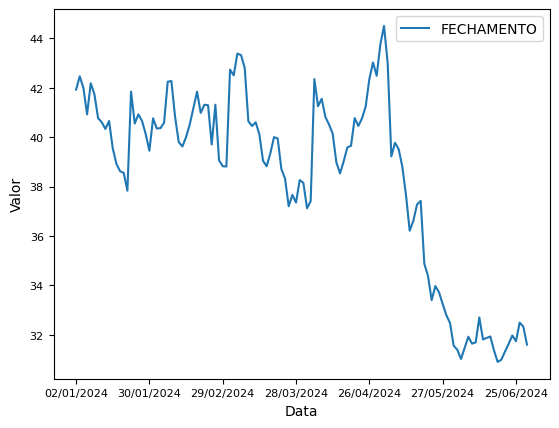

In [119]:

df.iloc[::-1].plot(y='FECHAMENTO', xlabel='Data', ylabel='Valor', fontsize=8)

### Separação input e target

In [120]:
df_shifted = df.shift(1)
df_shifted.dropna(inplace=True)

target = df_shifted.to_numpy()

input = df.iloc[1:].to_numpy()

n_test = 3

# input & target for training
x = input[n_test:]
y = target[n_test:]

# input & target for testing
x_test = input[:n_test]
y_test = target[:n_test]





            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO  VOLUME     SELIC
27/06/2024     32.50       32.33     -0.49   31.81   33.16   45.61  0.039270
26/06/2024     31.57       32.49      2.36   31.25   32.60   43.05  0.039270
25/06/2024     31.94       31.74     -0.72   31.22   31.94   26.39  0.039270
24/06/2024     31.79       31.97      1.07   31.68   32.29   19.91  0.039270
21/06/2024     31.32       31.63      0.99   30.83   31.66   55.79  0.039270
...              ...         ...       ...     ...     ...     ...       ...
08/01/2024     40.94       42.18      3.08   40.76   42.70   62.82  0.043739
05/01/2024     41.98       40.92     -2.55   40.80   42.31   72.03  0.043739
04/01/2024     42.60       41.99     -1.11   41.01   42.98   79.85  0.043739
03/01/2024     41.79       42.46      1.29   41.55   42.80   58.06  0.043739
02/01/2024     44.34       41.92     -5.37   41.66   44.41   99.90  0.043739

[123 rows x 7 columns]
[[ 3.1790e+01  3.1970e+01  1.0700e+00  3.1680e+01  3